# Project: Titanic - Machine Learning from Disaster

# 1. Introduce 
he sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


# 2. Load Data

In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
test_df= pd.read_csv('/Users/zzz/Downloads/test.csv', index_col='PassengerId')
train_df=pd.read_csv('/Users/zzz/Downloads/train.csv', index_col='PassengerId')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train_df['Survived']=train_df['Survived'].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.5+ KB


In [32]:
features=["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature]=df[feature].astype('category')
convert_cat(train_df,features)
convert_cat(test_df,features)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_size  891 non-null    int64   
 13  family_cat   354 non-null    category
dtypes: category(6), float64(2), int64(2), object(4)
memory usage: 109.1+ KB


In [58]:
train_df.describe()

,Survived,Age,Fare,Family_size
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,1.904602
std,0.486592,14.526497,49.693429,1.613459
min,0.000000,0.420000,0.000000,1.000000
25%,0.000000,20.125000,7.910400,1.000000
50%,0.000000,28.000000,14.454200,1.000000
75%,1.000000,38.000000,31.000000,2.000000
max,1.000000,80.000000,512.329200,11.000000


In [9]:
train_df.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3.Exploratory Data Analysis

In [21]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [57]:
train_df.Sex.value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

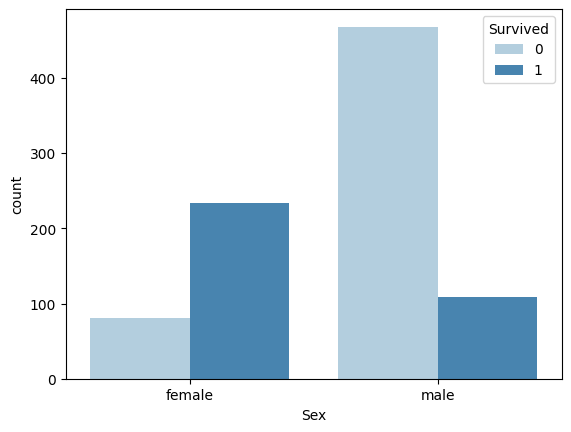

In [76]:
sns.countplot(data=train_df, x='Sex',hue='Survived',palette='Blues')

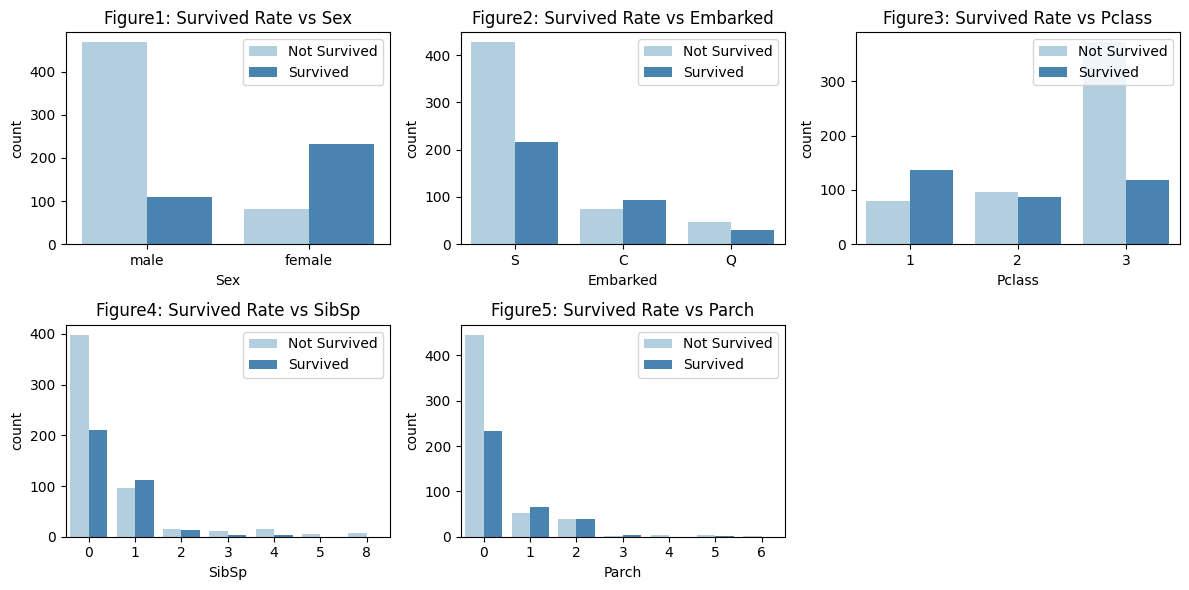

In [27]:
cols=['Sex','Embarked','Pclass','SibSp','Parch']
n_rows=2
n_cols=3
fig, ax=plt.subplots(n_rows, n_cols, figsize=(n_rows*6,n_cols*2))
for r in range(0, n_rows):
    for c in range (0, n_cols):
        i=r*n_cols + c #loop
        if i < len(cols):
            ax_i= ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f'Figure{i+1}: Survived Rate vs {cols[i]}')
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

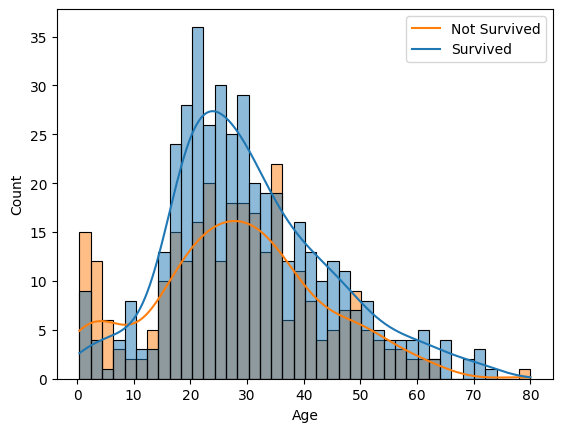

In [82]:
sns.histplot(data=train_df,x='Age', hue='Survived', bins=40,kde=True)
plt.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

. Majority passengers were pass from 28-40 ages
. Children had more chance to survived than other ages

### Fare

In [56]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

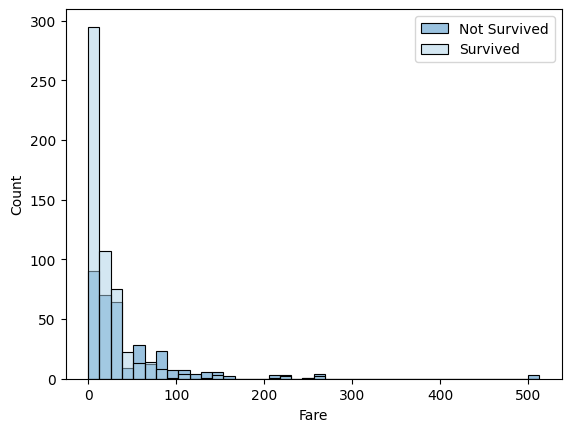

In [109]:
sns.histplot(data=train_df, x='Fare',bins=40,hue='Survived',palette='Blues')
plt.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

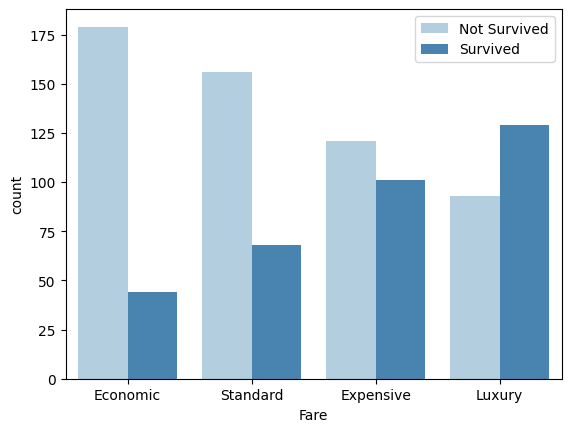

In [110]:
fare_cate=['Economic','Standard','Expensive','Luxury']
quantile_df=pd.qcut(train_df['Fare'],4,labels=fare_cate)
sns.countplot(data=train_df,x=quantile_df,hue='Survived',palette='Blues')
plt.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])


- Distribution of Fare:
    - Fare does not follow a normal distribution has a huge strike at the price range`[0-100$]`
    - The distribution is skewed to the left with 75% of the fare under `$31` and a max paid fare of `$512`
- Quantile plot:
    - Passengers with Expensive & Luxury will have more chance to survive

# 4. Feature Engineering & Data Wrangling


## Name

In [9]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [9]:
import re
def extract_title(name):
    p = re.compile(r', ([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()
train_df['Title']=train_df['Name'].apply(lambda name:extract_title(name))
test_df['Title']=test_df['Name'].apply(lambda name:extract_title(name))

In [10]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [24]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Sir               1
the Countess      1
Don               1
Jonkheer          1
Ms                1
Mme               1
Lady              1
Name: Title, dtype: int64

In [55]:
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title
    elif title in 'Ms':
        return  'Miss'
    else:
        return 'Others'
train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

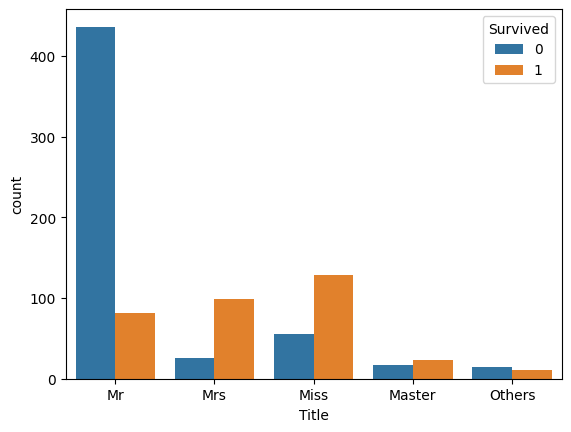

In [13]:
sns.countplot(data=train_df, x='Title', hue='Survived')

## Family
- SibSp, Parch

In [34]:
train_df['Family_size']=train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1
test_df['Family_size']=test_df['SibSp'].astype('int')+test_df['Parch'].astype('int') +1

In [76]:
train_df['Family_cat']=pd.cut(train_df['Family_size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

In [77]:
test_df['Family_cat']=pd.cut(test_df['Family_size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

<Axes: xlabel='Family_cat', ylabel='count'>

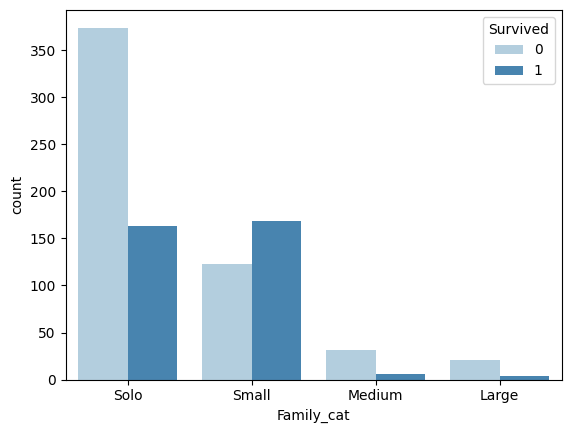

In [78]:
sns.countplot(data=train_df, x='Family_cat', hue='Survived', palette='Blues')

## 4.2 Data Wranling

In [79]:
num_features= ['Age','Fare']
cat_features= ['Sex','Pclass','Embarked','Title','Family_cat']
feature_cols= num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [80]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f'Col {col} has {missing_count*100/n_rows:.2f}% missing values.')


In [83]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### Filling missing values
#### Age
- Filling missing  values with `median` of wwhole dataset

In [84]:
age_by_sex_pclass=train_df.groupby(['Sex','Pclass']).median()['Age']

In [85]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [87]:
train_df['Age']=train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
test_df['Age']=test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [90]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [131]:
x=train_df[feature_cols]
y=train_df['Survived']

In [130]:
x_test=test_df[feature_cols]

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
num_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [133]:
preprocessor=ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [134]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [135]:
x= preprocessor.transform(x)

In [136]:
x_test= preprocessor.transform(x_test)

# 5. Training model

In [137]:
from sklearn.model_selection import train_test_split

In [139]:
x_train, x_val, y_train, y_val =train_test_split(x,y, test_size=0.2)

In [143]:
x_test.shape

(418, 19)

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [174]:
#LogisticRegession
log_reg= LogisticRegression(solver='liblinear',max_iter=1000)
log_reg.fit(x_train , y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [147]:
log_reg.score(x_val, y_val)

0.7877094972067039

In [148]:
y_pred=log_reg.predict(x_val)

In [153]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7413793103448276, 0.6515151515151515)

In [156]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       113
           1       0.74      0.65      0.69        66

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.79      0.78       179



In [173]:
#PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features_x_train= poly.fit_transform(x_train)
poly_features_x_val= poly.transform(x_val)

In [167]:
poly_log_reg= LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [168]:
poly_log_reg.score(poly_features_x_val, y_val)

0.7988826815642458

In [171]:
#decision tree
decission_tree = DecisionTreeClassifier()
decission_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [175]:
decission_tree.score(x_val, y_val)

0.770949720670391

## 5.1 Cross-validation

In [176]:
from sklearn.model_selection import cross_val_score

In [178]:
log_reg_cv = LogisticRegression(solver='liblinear',max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_score= cross_val_score(log_reg_cv, x,y,scoring='accuracy', cv=5)

In [181]:
lr_score.mean(), lr_score.std()

(0.826031008725127, 0.020466357172416235)

In [182]:
dt_score=cross_val_score(dt_cv, x,y,scoring='accuracy', cv=5)

In [184]:
dt_score.mean(), dt_score.std()

(0.8069801016885318, 0.014586754299604428)

## 5.2 Baseline Model Comparison

In [252]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
seed= 2023

models=[
    LinearSVC(max_iter=12000,dual='auto',random_state=2023),
    SVC(random_state=2023,),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
]   

In [259]:
def generate_baseline_results(models, x, y,metrics, cv=5, plot_results=False):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name= model.__class__.__name__
        scores= cross_val_score(model, x, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
    cv_df=pd.DataFrame(entries, columns=['model_name','fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df,color='lightblue',showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross=validation')
        plt.xticks(rotation=45)
        plt.show
    #Summary result
    mean=cv_df.groupby('model_name')['accuracy_score'].mean()
    std=cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results=pd.concat([mean,std], axis =1, ignore_index=True)
    baseline_results.columns=['Mean', 'Standard Deviation']

    baseline_results.sort_values(by=['Mean'],ascending=False, inplace=True)
    return baseline_results
generate_baseline_results(models, x, y, metrics='accuracy', cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.806936,0.015488
DecisionTreeClassifier,0.794608,0.016252
